In [4]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd 

In [6]:
notas = {'joao':85, 'maria':90, 'pedro':88}
notas

{'joao': 85, 'maria': 90, 'pedro': 88}

In [7]:
print(notas['maria'])

90


In [8]:
notas_aluno = {
    'joao': {'matematica': 90, 'portugues': 85, 'ciencias': 88},
    'maria': {'matematica': 95, 'portugues': 92, 'ciencias': 89},
    'pedro':{'matematica': 80, 'portugues': 75, 'ciencias': 82}
}
notas_aluno

{'joao': {'matematica': 90, 'portugues': 85, 'ciencias': 88},
 'maria': {'matematica': 95, 'portugues': 92, 'ciencias': 89},
 'pedro': {'matematica': 80, 'portugues': 75, 'ciencias': 82}}

In [10]:
nota_maria = notas_aluno['maria']
print('a nota de maria é:', nota_maria)

a nota de maria é: {'matematica': 95, 'portugues': 92, 'ciencias': 89}


In [11]:
nota_maria_matematica = notas_aluno['maria']['matematica']
print('a nota de maria de matematica é:', nota_maria_matematica)

a nota de maria de matematica é: 95


In [12]:
# add pesso na lista ja feita
notas_aluno['ana'] = {'matematica': 88, 'portugues':91, 'ciencias':85}
notas_aluno

{'joao': {'matematica': 90, 'portugues': 85, 'ciencias': 88},
 'maria': {'matematica': 95, 'portugues': 92, 'ciencias': 89},
 'pedro': {'matematica': 80, 'portugues': 75, 'ciencias': 82},
 'ana': {'matematica': 88, 'portugues': 91, 'ciencias': 85}}

In [13]:
df = pd.DataFrame(notas_aluno)
print(df)

            joao  maria  pedro  ana
matematica    90     95     80   88
portugues     85     92     75   91
ciencias      88     89     82   85


In [14]:
dados_dois_alunos = df.loc[:, ['joao', 'maria']]
dados_dois_alunos

,joao,maria
matematica,90,95
portugues,85,92
ciencias,88,89


In [15]:
df['joao']

matematica    90
portugues     85
ciencias      88
Name: joao, dtype: int64

In [16]:
df['joao']['matematica']

90

In [17]:
datas = ['01-01-2024', '01-02-2024', '01-03-2024']


In [18]:
datas_formatadas = pd.to_datetime(datas, format='%d-%m-%Y')
df['data'] = datas_formatadas

df

,joao,maria,pedro,ana,data
matematica,90,95,80,88,2024-01-01
portugues,85,92,75,91,2024-02-01
ciencias,88,89,82,85,2024-03-01


In [19]:
df['data'] = pd.to_datetime(df['data'], format='%d-%m-%Y')
df['ano'] = df['data'].dt.year
df['mes'] = df['data'].dt.month

df

,joao,maria,pedro,ana,data,ano,mes
matematica,90,95,80,88,2024-01-01,2024,1
portugues,85,92,75,91,2024-02-01,2024,2
ciencias,88,89,82,85,2024-03-01,2024,3


In [ ]:
# para instalar o barato do excel

In [20]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
# salvar em csv
df.to_csv('exemplo11.csv')

PermissionError: [Errno 13] Permission denied: 'exemplo11.csv'

In [22]:
# salvando em excel
df.to_excel('exemplo1.xlsx')

In [23]:
produtos_tec = {
    'produtos': {'celular','celular','celular', 'tablet','tablet','tablet', 'notbook', 'notbook', 'notbook'},
    'mes': {'01-01-2023','01-02-2023','01-03-2023','01-01-2023','01-02-2023','01-03-2023','01-01-2023','01-02-2023','01-03-2023'},
    'vendas': {150, 180, 200, 100, 120, 130, 80, 90, 100}
}
produtos_tec

{'produtos': {'celular', 'notbook', 'tablet'},
 'mes': {'01-01-2023', '01-02-2023', '01-03-2023'},
 'vendas': {80, 90, 100, 120, 130, 150, 180, 200}}

In [32]:
data = {
    'produtos': ['celular','celular','celular', 'tablet','tablet','tablet', 'notbook', 'notbook', 'notbook'],
    'mes': ['01-01-2023','01-02-2023','01-03-2023','01-01-2023','01-02-2023','01-03-2023','01-01-2023','01-02-2023','01-03-2023'],
    'vendas': [150, 180, 200, 100, 120, 130, 80, 90, 100]
}
data

df = pd.DataFrame(data)
df

,produtos,mes,vendas
0,celular,01-01-2023,150
1,celular,01-02-2023,180
2,celular,01-03-2023,200
3,tablet,01-01-2023,100
4,tablet,01-02-2023,120
5,tablet,01-03-2023,130
6,notbook,01-01-2023,80
7,notbook,01-02-2023,90
8,notbook,01-03-2023,100


In [33]:
df['mes'] = pd.to_datetime(df['mes'], format='%d-%m-%Y')
df['ano'] = df['mes'].dt.year
df['mes'] = df['mes'].dt.month

In [35]:
vendas_series = pd.Series(df['vendas'].values, index=df['mes'])
vendas_series

mes
1    150
2    180
3    200
1    100
2    120
3    130
1     80
2     90
3    100
dtype: int64

In [39]:
# aqui ele faz a soma o .groupby para agrupar os produtos e depois que ele agrupa ele pede para eu dar alguma função no caso usei a soma.
produto_mais_vendido = df.groupby('produtos')['vendas'].sum()
produto_mais_vendido

produtos
celular    530
notbook    270
tablet     350
Name: vendas, dtype: int64

In [40]:
produto_mais_vendido = df.groupby('produtos')['vendas'].sum().idxmax()
produto_mais_vendido

'celular'

In [44]:
media_vendas = vendas_series.mean()
media2_vendas = vendas_series.median()
minimo_vendas = vendas_series.min()
maximo_vendas = vendas_series.max()

print(f"a media mean é {media_vendas:.2f}, a media midian é {media2_vendas}, o minimo de vendas é {minimo_vendas}, e a maxima de venda é {maximo_vendas}")

a media mean é 127.78, a media midian é 120.0, o minimo de vendas é 80, e a maxima de venda é 200


In [50]:
pip install matplotlib

                                              0.0/7.6 MB ? eta -:--:--
     -                                        0.3/7.6 MB 8.6 MB/s eta 0:00:01
     ---                                      0.6/7.6 MB 7.5 MB/s eta 0:00:01
     ----                                     0.8/7.6 MB 6.4 MB/s eta 0:00:02
     -----                                    1.0/7.6 MB 6.0 MB/s eta 0:00:02
     ------                                   1.3/7.6 MB 5.8 MB/s eta 0:00:02
     -------                                  1.5/7.6 MB 5.5 MB/s eta 0:00:02
     --------                                 1.6/7.6 MB 5.4 MB/s eta 0:00:02
     ---------                                1.8/7.6 MB 4.9 MB/s eta 0:00:02
     ---------                                1.9/7.6 MB 4.6 MB/s eta 0:00:02
     ----------                               2.0/7.6 MB 4.4 MB/s eta 0:00:02
     -----------                              2.1/7.6 MB 4.2 MB/s eta 0:00:02
     -----------                              2.3/7.6 MB 4.1 MB/s eta 0


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [49]:
df_grouped = df.groupby(['mes', 'produtos'])['vendas'].sum().unstack()
df_grouped

produtos,celular,notbook,tablet
mes,,,
1,150,80,100
2,180,90,120
3,200,100,130


In [58]:
df['variação porcentual'] = df.groupby('produtos')['vendas'].pct_change()

In [64]:
mes_maior_variacao = df.loc[df['variação porcentual'].idxmax()]['mes']
mes_maior_variacao = df.loc[df['variação porcentual'].idxmin()]['mes']
mes_maior_variacao


3

In [63]:
df

,produtos,mes,vendas,ano,variação porcentual
0,celular,1,150,2023,NaN
1,celular,2,180,2023,0.200000
2,celular,3,200,2023,0.111111
3,tablet,1,100,2023,NaN
4,tablet,2,120,2023,0.200000
5,tablet,3,130,2023,0.083333
6,notbook,1,80,2023,NaN
7,notbook,2,90,2023,0.125000
8,notbook,3,100,2023,0.111111


In [54]:
import matplotlib.pyplot as plt

<Figure size 1000x600 with 0 Axes>

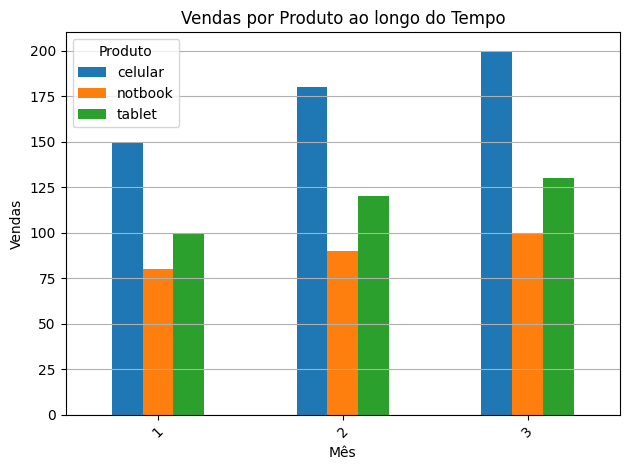

In [56]:
df_grouped = df.groupby(['mes', 'produtos'])['vendas'].sum().unstack()

plt.figure(figsize=(10, 6))
df_grouped.plot(kind='bar', stacked=False)

plt.title("Vendas por Produto ao longo do Tempo")
plt.xlabel("Mês")
plt.ylabel("Vendas")
plt.xticks(rotation=45)
plt.legend(title='Produto')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
tabela_vendas = {
    'data': {'1/1/2024','1/2/2024','1/3/2024','1/4/2024','1/5/2024','1/1/2024','1/2/2024','1/3/2024','1/4/2024','1/5/2024','1/1/2024','1/2/2024','1/3/2024','1/4/2024','1/5/2024',},
    'produto': {'ar frio', 'ar frio', 'ar frio','ar frio','ar frio', 'ventilador', 'ventilador', 'ventilador', 'ventilador', 'ventilador', 'ar quente', 'ar quente', 'ar quente', 'ar quente', 'ar quente'},
    'quantidade': {100, 120, 130, 110, 150, 150, 140, 160, 130, 170, 80, 90, 100, 85, 95}
}

In [65]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [67]:
import pandas as pd 
